# Pandas处理表数据
以美国USGS下载的地震目录为例，用pandas筛选出目录中5级以上，深度100km以下的地震

        latitude   longitude       depth        mag         nst        gap  \
count  17.000000   17.000000   17.000000  17.000000   17.000000  17.000000   
mean  -15.664818  -26.217959  278.173118   5.747059  136.176471  31.529412   
std    19.238830  134.255645  174.379109   0.571312   73.331640  17.062816   
min   -56.076000 -178.796600  105.240000   5.100000   49.000000  12.000000   
25%   -23.560800 -176.570200  131.627000   5.300000   97.000000  22.000000   
50%   -20.531500  -66.515100  209.976000   5.600000  113.000000  32.000000   
75%    -5.405800  123.160900  466.766000   6.300000  164.000000  34.000000   
max    36.518600  179.973800  598.925000   6.900000  345.000000  82.000000   

            dmin        rms  horizontalError  depthError   magError     magNst  
count  17.000000  17.000000        17.000000   17.000000  17.000000  17.000000  
mean    2.626353   0.929412         7.929412    4.780882   0.061471  39.470588  
std     1.569602   0.338701         1.762755    1.7381

<Axes: xlabel='longitude', ylabel='latitude'>

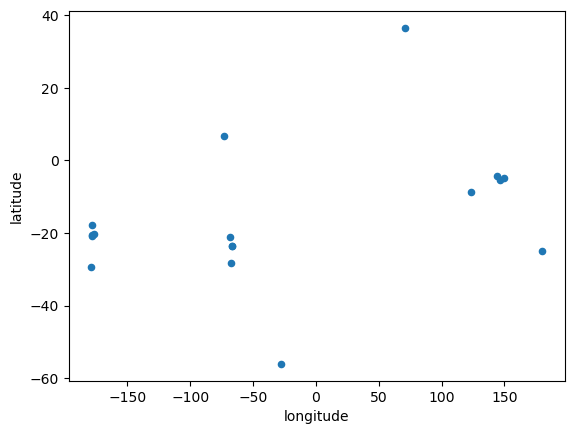

In [1]:
import pandas as pd
ctlg = pd.read_csv('data/usgs_catalog_20230300_0330.csv')
#print(ctlg)
#print(df.describe())
subctlg = ctlg[((ctlg.mag>5)&(ctlg.depth>100))]
print(subctlg.describe())
subctlg.plot.scatter(x='longitude',y='latitude')

# Numpy代替for循环，做向量和矩阵运算
* 一维数组
  * 向量算数运算
  * 通用函数
  * 向量逻辑运算
* 二维数组
  * 广播机制
* 线性代数
* I/O

In [2]:
import numpy as np
# 一维数组
## 构造均匀分布的浮点数数组
x0 = np.linspace(0,1,11)
x1 = np.arange(11)/10
## 构造全1/0数组
x2 = np.ones(11)
x3 = np.zeros(11)
## 以函数形式构造数组sin(x)，其中x为[0,pi]区间的10等分点
x4 = np.cos(x0*np.pi)
## 拼接两个数组x0,x4
x5 = np.hstack([x0,x4])
print(x0,x1,x2,x3,x4,x5)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [ 1.00000000e+00  9.51056516e-01  8.09016994e-01  5.87785252e-01
  3.09016994e-01  6.12323400e-17 -3.09016994e-01 -5.87785252e-01
 -8.09016994e-01 -9.51056516e-01 -1.00000000e+00] [ 0.00000000e+00  1.00000000e-01  2.00000000e-01  3.00000000e-01
  4.00000000e-01  5.00000000e-01  6.00000000e-01  7.00000000e-01
  8.00000000e-01  9.00000000e-01  1.00000000e+00  1.00000000e+00
  9.51056516e-01  8.09016994e-01  5.87785252e-01  3.09016994e-01
  6.12323400e-17 -3.09016994e-01 -5.87785252e-01 -8.09016994e-01
 -9.51056516e-01 -1.00000000e+00]


In [3]:
# 向量算术运算
## 向量与常数
x0+1 # x0*2;x0/2;x0**2
## 向量与向量
x0+x1 #x0-x1;x0*x1;x0/(x1+1e-10);np.dot(x0,np.array([[0],[1]]))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [4]:
# 通用函数
print(np.sign.__doc__)
#abs;angle;real;imag;conj;fix
#cos;sin;tan;arccos;arcsin;arctan;arctan2;cosh;sinh;tanh;arccosh;arcsinh;arctanh
#exp;log;log10;sqrt
#mean;min;max;std;sum;var;correlate;cumsum;prod;cumprod
#poly

sign(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Returns an element-wise indication of the sign of a number.

The `sign` function returns ``-1 if x < 0, 0 if x==0, 1 if x > 0``.  nan
is returned for nan inputs.

For complex inputs, the `sign` function returns
``sign(x.real) + 0j if x.real != 0 else sign(x.imag) + 0j``.

complex(nan, 0) is returned for complex nan inputs.

Parameters
----------
x : array_like
    Input values.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    condition is True, the `out` array will be set to the ufun

In [5]:
# 向量逻辑运算
logic = np.zeros_like(x0)
index = x0>.5#筛选出x0内大于.5的数
logic[index] = 1
print(x0,index,logic)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [False False False False False False  True  True  True  True  True] [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]


In [6]:
# 二维数组
## 构造二维数组
xy0 = np.array([[0,1,2,3],[4,5,6,7]])
print(xy0,xy0.shape)
## 访问其中某个元素
print(xy0[1,1])
## 切片
print(xy0[1:,:-1])
## 改造数组形状
print(np.reshape(xy0,(4,-1)))
## 转置
print(xy0.T)
## 构造单位矩阵，对角矩阵
print(np.identity(3))

[[0 1 2 3]
 [4 5 6 7]] (2, 4)
5
[[4 5 6]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
## 广播（当两个一维数组的维度不一样时，依然可以做算数运算）
x1T = np.expand_dims(x1,axis=1)
z = x1T+x2 #x1T*x2;x1T/(x2+1e-10)
print(x1T)
print(z,x1+x2)

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1]
 [1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2]
 [1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3]
 [1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4]
 [1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5]
 [1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6]
 [1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7]
 [1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8 1.8]
 [1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9]
 [2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2. ]] [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


In [8]:
# 线性代数
## 矩阵乘法
A = np.matrix([[1,2],[3,4]])
b = np.matrix([[5],[6]])
C = A*b
print(C)
## 求解线性方程组
import numpy.linalg as npl
x = npl.solve(A,b)
print(x)

[[17]
 [39]]
[[-4. ]
 [ 4.5]]


In [9]:
# I/O (深度学习领域最喜欢的I/O方式)
np.savez('test.npz',data=x0)
d = np.load('data/test.npz')
print(d['data'])
## 其他I/O方式：loadtxt

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


# Scipy做科学计算

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

duration = 1.0
fs = 400.0
samples = int(fs*duration)
t = np.arange(samples)/fs
# We create a chirp of which the frequency increases from 20 Hz to 100 Hz and apply an amplitude modulation.
signal = chirp(t, 20.0, t[-1], 100.0)
signal *= (1.0+0.5*np.sin(2.0*np.pi*4.0*t)) #可以改变调幅信号的周期观察波形的变化

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

# Maplotlib可视化

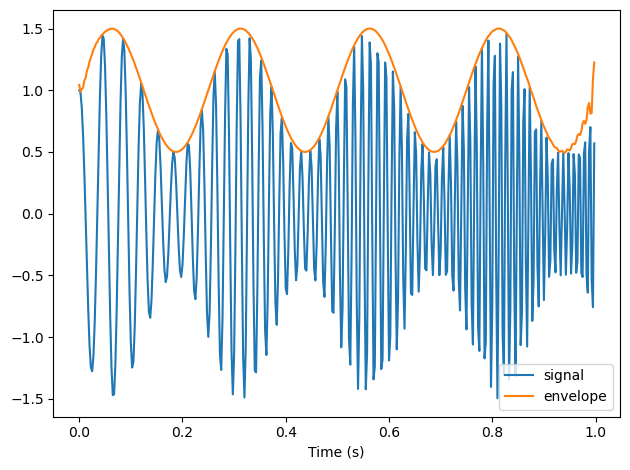

In [11]:
plt.plot(t, signal, label='signal')
plt.plot(t, amplitude_envelope, label='envelope')
plt.xlabel("Time (s)")
plt.legend()
plt.tight_layout()
plt.savefig('hilbert.pdf')

# 推荐阅读
* 《Python科学计算》 作者：John M. Stewart
* https://pandas.pydata.org/docs/user_guide/index.html#user-guide
* https://numpy.org/doc/stable/user/index.html#user
* https://docs.scipy.org/doc//scipy/tutorial/index.html#user-guide
* https://matplotlib.org/stable/tutorials/index.html
* 关于Python画地图，请参考 https://www.pygmt.org/latest/index.html